In [1]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data 
# 텐서플로우 1버전에서 사용하는 방법

In [2]:
import sys
import numpy as np
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt

In [3]:
# 1. MNIST data set import
mnist = tf.keras.datasets.mnist
tf.random.set_seed(1234)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# training, test set 개수
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


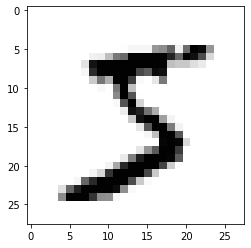

In [6]:
# 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [7]:
# 0번째 원소 데이터 출력
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d ' % i)
    sys.stdout.write('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [8]:
# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
# 4. 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-trai

In [12]:
# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2231 - accuracy: 0.9332 - val_loss: 0.1293 - val_accuracy: 0.9614
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0915 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0777 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0819 - val_accuracy: 0.9780


In [13]:
# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy : ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9780
Accuracy :  0.9779999852180481


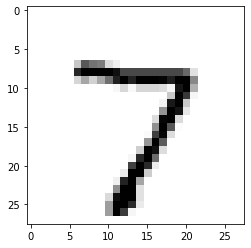

The predictions are  [[1.09111165e-08 8.40290159e-06 2.62902154e-06 3.26002337e-05
  1.29388681e-07 3.37574477e-07 3.88319626e-10 9.99955177e-01
  2.50428513e-07 6.09920335e-07]]
The predictions are  7


In [23]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print("The predictions are ", model.predict(x_test[n].reshape((1,28,28,1))))
print("The answer is ", np.argmax(model.predict(x_test[n].reshape((1,28,28,1)))))